## **Problem Statement**
- A supervised ML model which uses Decision Tree Classifier to predict
the appropriate medication/Drug type ( target variable ) for patients suffering from a specific illness based on their :
  1. Age
  2. Sex
  3. Blood Pressure.
  4. Cholesterol levels.
  5. Na_to_K.




#### **1.Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### **2.Loading the data**

In [2]:
data = pd.read_csv("drug.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           198 non-null    object 
 3   Cholesterol  198 non-null    object 
 4   Na_to_K      199 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


#### **3.Data preprocessing**

#### **Handling the missing Values**

In [3]:
# Checking the number of null values
data.isnull().sum()

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64

In [4]:
# Handle missing values by dropping them as they represent very small number of data
data.dropna( inplace=True )

#### **Categorical Encoding**

In [5]:
# One Hot Encoding
data_encoded = pd.get_dummies(data, columns=["Sex", "BP", "Cholesterol"], drop_first=True)

In [6]:
# Label Encoding
drug_dict = { "drugA" : 1 ,  "drugB" : 2 , "drugC" : 3 , "drugX": 4 , "drugY" : 5}
data_encoded["Drug"] = data_encoded["Drug"].replace(drug_dict)

In [7]:
data_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,5,0,0,0,0
1,47,13.093,3,1,1,0,0
2,47,10.114,3,1,1,0,0
4,61,18.043,5,0,1,0,0
5,22,8.607,4,0,0,1,0
...,...,...,...,...,...,...,...
194,46,34.686,5,0,0,0,0
195,56,11.567,3,0,1,0,0
196,16,12.006,3,1,1,0,0
197,52,9.894,4,1,0,1,0


#### **4. Splitting the data to X (inputs) and Y (output)**

In [8]:
# Extract features and target variable
X = data_encoded.drop('Drug', axis=1)
y = data_encoded['Drug']

#### **5.Modeling**

In [9]:
# Define a function for the experiment ( training , testing , evaluation )
def run_experiment(X_train, X_test, y_train, y_test):
    # Train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Return the decision tree and accuracy
    return clf, acc

#### **Training and Testing with Fixed Train-Test Split Ratio**

In [10]:
best_accuracy = 0
best_model = None
# Different random states values
rs_values = [15, 20 , 26 , 36 , 42]
for i , random_state in enumerate (rs_values , start = 1):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= random_state )

    # Run the experiment
    tree, accuracy = run_experiment(X_train, X_test, y_train, y_test)

    # Print results
    print(f"Experiment {i} --> Test Accuracy : {accuracy:.4f} , Training Size : {len(X_train)} , Testing Size : {len(X_test)} , Tree Size : {tree.tree_.node_count}")

    # To select the model that achieves the highest overall performance.
    if accuracy > best_accuracy :
      best_accuracy = accuracy
      best_model = tree

print ( " " )
print ("Best model : ")
print(f"Test Accuarcy : {best_accuracy:.4f} , Tree Size : {best_model.tree_.node_count}")

Experiment 1 --> Test Accuracy : 0.9831 , Training Size : 136 , Testing Size : 59 , Tree Size : 11
Experiment 2 --> Test Accuracy : 0.9831 , Training Size : 136 , Testing Size : 59 , Tree Size : 11
Experiment 3 --> Test Accuracy : 0.9831 , Training Size : 136 , Testing Size : 59 , Tree Size : 11
Experiment 4 --> Test Accuracy : 1.0000 , Training Size : 136 , Testing Size : 59 , Tree Size : 11
Experiment 5 --> Test Accuracy : 0.9831 , Training Size : 136 , Testing Size : 59 , Tree Size : 11
 
Best model : 
Test Accuarcy : 1.0000 , Tree Size : 11


#### **Training and Testing with a Range of Train-Test Split Ratios**

In [11]:
split_ratios = [0.3, 0.4, 0.5, 0.6, 0.7]
results = {'Training Size': [], 'Mean Accuracy': [], 'Max Accuracy': [], 'Min Accuracy': [], 'Mean Tree Size': [] , 'Max Tree Size' : [] , 'Min Tree Size' : []}

for split_ratio in split_ratios:
    accuracies = []
    tree_sizes = []

    for random_state in rs_values :
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - split_ratio, random_state= random_state)

        # Run the experiment
        tree, accuracy = run_experiment(X_train, X_test, y_train, y_test)

        # Append results
        accuracies.append(accuracy)
        tree_sizes.append(tree.tree_.node_count)

    # Calculate statistics
    mean_accuracy = np.mean(accuracies)
    max_accuracy = np.max(accuracies)
    min_accuracy = np.min(accuracies)

    mean_tree_size = np.mean(tree_sizes)
    max_tree_size = np.max(tree_sizes)
    min_tree_size = np.min(tree_sizes)


    # Store results
    results['Training Size'].append(split_ratio)
    results['Mean Accuracy'].append(mean_accuracy)
    results['Max Accuracy'].append(max_accuracy)
    results['Min Accuracy'].append(min_accuracy)
    results['Mean Tree Size'].append(mean_tree_size)
    results['Max Tree Size'].append(max_tree_size)
    results['Min Tree Size'].append(min_tree_size)

In [12]:
# Display results
result_df = pd.DataFrame(results)
print(result_df)

   Training Size  Mean Accuracy  Max Accuracy  Min Accuracy  Mean Tree Size  \
0            0.3       0.988321      0.992701      0.978102            11.4   
1            0.4       0.988034      1.000000      0.974359            11.0   
2            0.5       0.981633      1.000000      0.959184            11.0   
3            0.6       0.987179      1.000000      0.974359            11.0   
4            0.7       0.986441      1.000000      0.983051            11.0   

   Max Tree Size  Min Tree Size  
0             13             11  
1             11             11  
2             11             11  
3             11             11  
4             11             11  


#### **Plots**

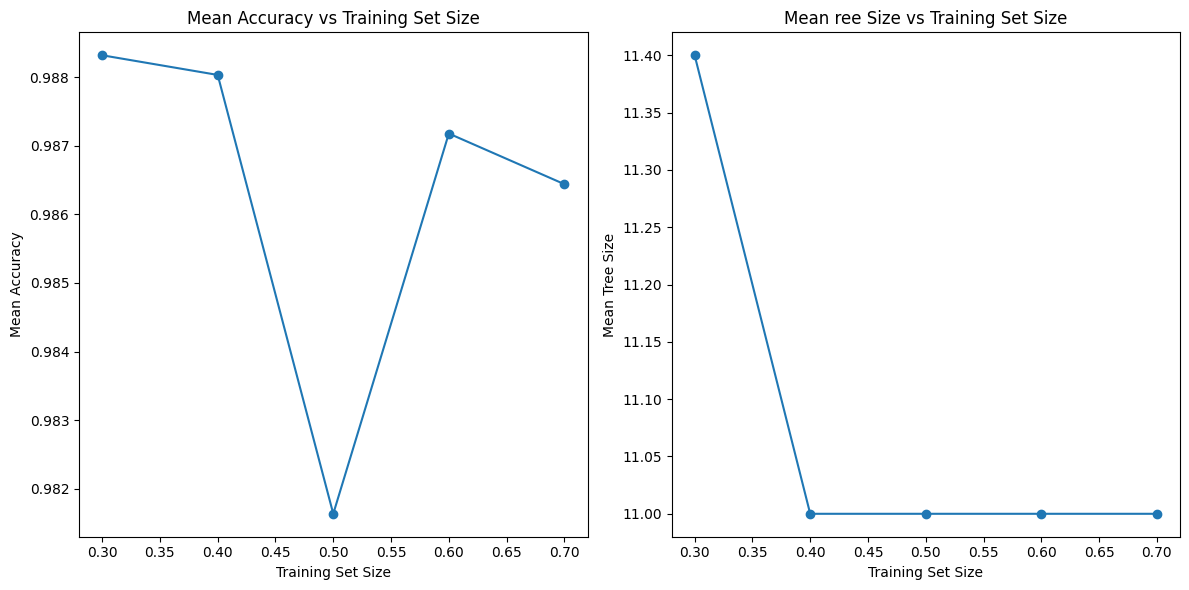

In [13]:
plt.figure(figsize=(12, 6))

# Accuracy vs Training Set Size
plt.subplot(1, 2, 1)
plt.plot(result_df['Training Size'], result_df['Mean Accuracy'], marker='o')
plt.title('Mean Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Accuracy')

# Tree Size vs Training Set Size
plt.subplot(1, 2, 2)
plt.plot(result_df['Training Size'], result_df['Mean Tree Size'], marker='o')
plt.title('Mean ree Size vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Tree Size')

plt.tight_layout()
plt.show()